# Airbnb - Booking Analysis Project 


This project focuses on performing an exploratory data analysis (EDA) of Airbnb listings within a selected city. The goal is to examine various factors such as price, availability, location, and property type to uncover the underlying trends and patterns that influence the demand for Airbnb listings. Through this analysis, we aim to provide a comprehensive overview of the Airbnb market in the city, helping stakeholders to make informed decisions.


## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium

## Loading Data

In [2]:
df = pd.read_csv('listings4.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,46071,Kamahi,202747,Donna,Taupo District,Turangi-Tongariro Ward,-38.90862,175.75285,Entire home/apt,255.0,2,25,2024-01-27,0.45,1,336,8,NaN
1,51362,PORTAGE HEIGHTS MARLBOROUGH SOUNDS,236005,Ralph & Cynthia,Marlborough District,Marlborough Sounds Ward,-41.19326,174.03374,Private room,290.0,2,59,2024-01-21,0.49,1,1,7,NaN
2,54680,By Waipuna Park,256989,Heather,Tauranga City,Te Papa-Welcome Bay Ward,-37.73336,176.17517,Private room,113.0,1,31,2024-01-06,0.23,1,322,6,NaN
3,56214,Kapiti home. Top Floor is yours - 5 nights min...,129152,Linda,Kapiti Coast District,Paekākāriki-Raumati Ward,-40.92235,174.99591,Private room,120.0,5,39,2023-02-02,0.25,1,0,0,NaN
4,63342,16 Havelock Bed and Breakfast,309199,Brad,New Plymouth District,New Plymouth City Ward,-39.06935,174.04085,Private room,110.0,1,61,2023-03-19,0.39,1,265,1,NaN


In [3]:
df.shape

(43484, 18)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43484 entries, 0 to 43483
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              43484 non-null  int64  
 1   name                            43484 non-null  object 
 2   host_id                         43484 non-null  int64  
 3   host_name                       43484 non-null  object 
 4   neighbourhood_group             43484 non-null  object 
 5   neighbourhood                   43484 non-null  object 
 6   latitude                        43484 non-null  float64
 7   longitude                       43484 non-null  float64
 8   room_type                       43484 non-null  object 
 9   price                           42969 non-null  float64
 10  minimum_nights                  43484 non-null  int64  
 11  number_of_reviews               43484 non-null  int64  
 12  last_review                     

## Data Cleaning

### 1- Locate Missing Data

In [5]:
df.isnull().sum()

id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                               515
minimum_nights                        0
number_of_reviews                     0
last_review                        4277
reviews_per_month                  4277
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
license                           43484
dtype: int64

#### 1.1 Drop the data

In [6]:
df.drop(['id','host_name','last_review','license'], inplace =True, axis =1)
df

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,Kamahi,202747,Taupo District,Turangi-Tongariro Ward,-38.908620,175.752850,Entire home/apt,255.0,2,25,0.45,1,336,8
1,PORTAGE HEIGHTS MARLBOROUGH SOUNDS,236005,Marlborough District,Marlborough Sounds Ward,-41.193260,174.033740,Private room,290.0,2,59,0.49,1,1,7
2,By Waipuna Park,256989,Tauranga City,Te Papa-Welcome Bay Ward,-37.733360,176.175170,Private room,113.0,1,31,0.23,1,322,6
3,Kapiti home. Top Floor is yours - 5 nights min...,129152,Kapiti Coast District,Paekākāriki-Raumati Ward,-40.922350,174.995910,Private room,120.0,5,39,0.25,1,0,0
4,16 Havelock Bed and Breakfast,309199,New Plymouth District,New Plymouth City Ward,-39.069350,174.040850,Private room,110.0,1,61,0.39,1,265,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43479,Papakura private double bedroom,535720361,Auckland,Manurewa-Papakura Ward,-37.057659,174.967196,Private room,50.0,1,0,NaN,2,269,0
43480,Best value! New-built townhouse 15 min drive t...,262715266,Wellington City,Takapū/Northern Ward,-41.182128,174.824226,Entire home/apt,110.0,2,0,NaN,2,156,0
43481,Luxury home in Central Auckland,93730793,Auckland,Albert-Eden-Puketāpapa Ward,-36.866645,174.704694,Entire home/apt,752.0,2,0,NaN,1,59,0
43482,Blomfield 3 bedrooms house,146718307,Rotorua District,Area Outside Ward,-38.141245,176.201788,Entire home/apt,200.0,1,0,NaN,1,242,0


In [7]:
df.isnull().sum()

name                                 0
host_id                              0
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                              515
minimum_nights                       0
number_of_reviews                    0
reviews_per_month                 4277
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
dtype: int64

In [8]:
# معالجة القيم الفارغة في خاصية السعر
# الاطلاع على العقارات التي لا تملك سعر محدد
missing_price_rows = df[df['price'].isna()]
missing_price_rows

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
73,Days Bay Apartment-Relaxing Beach/Bush/Cafes/F...,3057800,Lower Hutt City,Harbour Ward,-41.278580,174.907680,Entire home/apt,NaN,2,60,0.43,2,335,11
86,"Wellington Cottage, over Russell",2639225,Far North District,Bay of Islands-Whangaroa Ward,-35.257750,174.119130,Entire home/apt,NaN,3,6,0.06,1,365,1
135,Bradleys Garden Boutique BnB,5273772,Ruapehu District,Taumarunui Ward,-38.905360,175.237040,Hotel room,NaN,1,18,0.16,2,315,1
603,Spacious room with tranquil garden,9948559,Hamilton City,East Ward,-37.797350,175.301760,Private room,NaN,1,565,5.00,1,139,82
743,Fabulous Farmhouse Guest Room Fox Glacier,25967347,Westland District,Southern Ward,-43.462630,170.013320,Private room,NaN,1,716,6.52,4,298,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42932,16ft 1966 Windsor caravan,554997798,Buller District,Westport Ward,-41.758550,171.610420,Entire home/apt,NaN,1,4,4.00,1,0,4
43101,Eastbourne Waterfront Cottage,559891248,Lower Hutt City,Harbour Ward,-41.298110,174.893058,Entire home/apt,NaN,2,0,NaN,1,258,0
43161,Taupo Town House,557376293,Taupo District,Taupō Ward,-38.729263,176.078624,Entire home/apt,NaN,2,0,NaN,1,16,0
43293,Pahia BnB,502400921,Southland District,Waiau Aparima Ward,-46.309879,167.700531,Private room,NaN,1,0,NaN,2,268,0


In [9]:
# كل حي كم فيه عقار مجهول السعر منها  
missing_price_per_neighborhood = missing_price_rows.groupby('neighbourhood').size().reset_index(name='Missing Price Count')
missing_price_per_neighborhood

,neighbourhood,Missing Price Count
0,Albany Ward,13
1,Area Outside Ward,38
2,Bay of Islands-Whangaroa Ward,17
3,Bream Bay Ward,14
4,Central Ward,20
...,...,...
58,Wanaka Ward,25
59,West Ward,1
60,Western Ward,7
61,Westport Ward,6


In [10]:
# ملء القيم الفارغة في عمود السعر بمتوسط السعر لنفس الحي
neighborhood_price_means = df.groupby('neighbourhood')['price'].mean()

for neighborhood, price_mean in neighborhood_price_means.items():
    if pd.isna(price_mean):
        continue
    neighborhood_rows = df['neighbourhood'] == neighborhood
    df.loc[neighborhood_rows & df['price'].isna(), 'price'] = price_mean

df.loc[73:,:]

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
73,Days Bay Apartment-Relaxing Beach/Bush/Cafes/F...,3057800,Lower Hutt City,Harbour Ward,-41.278580,174.907680,Entire home/apt,205.988764,2,60,0.43,2,335,11
74,Centrewood Historic Homestead,3203994,Waitaki District,Waihemo Ward,-45.523120,170.758130,Entire home/apt,150.000000,1,48,0.35,1,350,8
75,Waterfront 'Pudding Island Cottage',3287140,Dunedin City,Area Outside Ward,-45.838140,170.644350,Entire home/apt,275.000000,3,45,0.36,1,342,0
76,"Beach Haven, Pukerua Bay",2752125,Porirua City,Northern Ward/Pukerua ki te Raki,-41.030620,174.890210,Private room,190.000000,1,26,0.21,1,123,2
77,Hereweka garden Retreat- Luxury Eco,3374624,Dunedin City,Area Outside Ward,-45.851850,170.652690,Entire home/apt,320.000000,2,52,0.39,1,228,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43479,Papakura private double bedroom,535720361,Auckland,Manurewa-Papakura Ward,-37.057659,174.967196,Private room,50.000000,1,0,NaN,2,269,0
43480,Best value! New-built townhouse 15 min drive t...,262715266,Wellington City,Takapū/Northern Ward,-41.182128,174.824226,Entire home/apt,110.000000,2,0,NaN,2,156,0
43481,Luxury home in Central Auckland,93730793,Auckland,Albert-Eden-Puketāpapa Ward,-36.866645,174.704694,Entire home/apt,752.000000,2,0,NaN,1,59,0
43482,Blomfield 3 bedrooms house,146718307,Rotorua District,Area Outside Ward,-38.141245,176.201788,Entire home/apt,200.000000,1,0,NaN,1,242,0


In [11]:
df.isnull().sum()

name                                 0
host_id                              0
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
reviews_per_month                 4277
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
dtype: int64

#### 1.2 Input missing data

In [12]:
df.dropna(inplace=True)
df.isnull().sum()

name                              0
host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
dtype: int64

### 2- Check for Duplicates

In [13]:
df.duplicated().sum()

1

In [14]:
df.drop_duplicates()

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,Kamahi,202747,Taupo District,Turangi-Tongariro Ward,-38.908620,175.752850,Entire home/apt,255.000000,2,25,0.45,1,336,8
1,PORTAGE HEIGHTS MARLBOROUGH SOUNDS,236005,Marlborough District,Marlborough Sounds Ward,-41.193260,174.033740,Private room,290.000000,2,59,0.49,1,1,7
2,By Waipuna Park,256989,Tauranga City,Te Papa-Welcome Bay Ward,-37.733360,176.175170,Private room,113.000000,1,31,0.23,1,322,6
3,Kapiti home. Top Floor is yours - 5 nights min...,129152,Kapiti Coast District,Paekākāriki-Raumati Ward,-40.922350,174.995910,Private room,120.000000,5,39,0.25,1,0,0
4,16 Havelock Bed and Breakfast,309199,New Plymouth District,New Plymouth City Ward,-39.069350,174.040850,Private room,110.000000,1,61,0.39,1,265,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43376,Tiny Cabin in Quiet Garden Space,499091946,Christchurch City,Banks Peninsula Ward,-43.629547,172.741569,Entire home/apt,75.000000,2,1,1.00,4,269,1
43395,Relax in the Warmth of Westport,560948008,Buller District,Westport Ward,-41.746622,171.600420,Entire home/apt,208.190476,1,1,1.00,1,223,1
43399,Newly renovated 2 bed cottage,560960812,Auckland,Albany Ward,-36.774212,174.665729,Entire home/apt,240.000000,1,1,1.00,1,235,1
43415,2 bedroom home with sea views,561099139,Wellington City,Motukairangi/Eastern Ward,-41.298899,174.805334,Entire home/apt,160.000000,1,1,1.00,1,232,1


In [15]:
df.shape

(39207, 14)

### 3- Detect Outliers

In [16]:
describe_data = df[['price', 'minimum_nights', 'number_of_reviews','reviews_per_month','calculated_host_listings_count','number_of_reviews_ltm']].describe()
describe_data 

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,number_of_reviews_ltm
count,39207.000000,39207.000000,39207.000000,39207.000000,39207.000000,39207.000000
mean,399.166821,2.061826,62.387890,1.978881,92.133471,18.713801
std,2157.821397,9.676858,99.500731,2.036649,401.828478,24.000098
min,18.000000,1.000000,1.000000,0.010000,1.000000,0.000000
25%,135.000000,1.000000,6.000000,0.560000,1.000000,3.000000
50%,211.000000,2.000000,24.000000,1.310000,2.000000,10.000000
75%,350.000000,2.000000,74.000000,2.720000,5.000000,25.000000
max,100000.000000,1000.000000,1546.000000,29.300000,2082.000000,404.000000


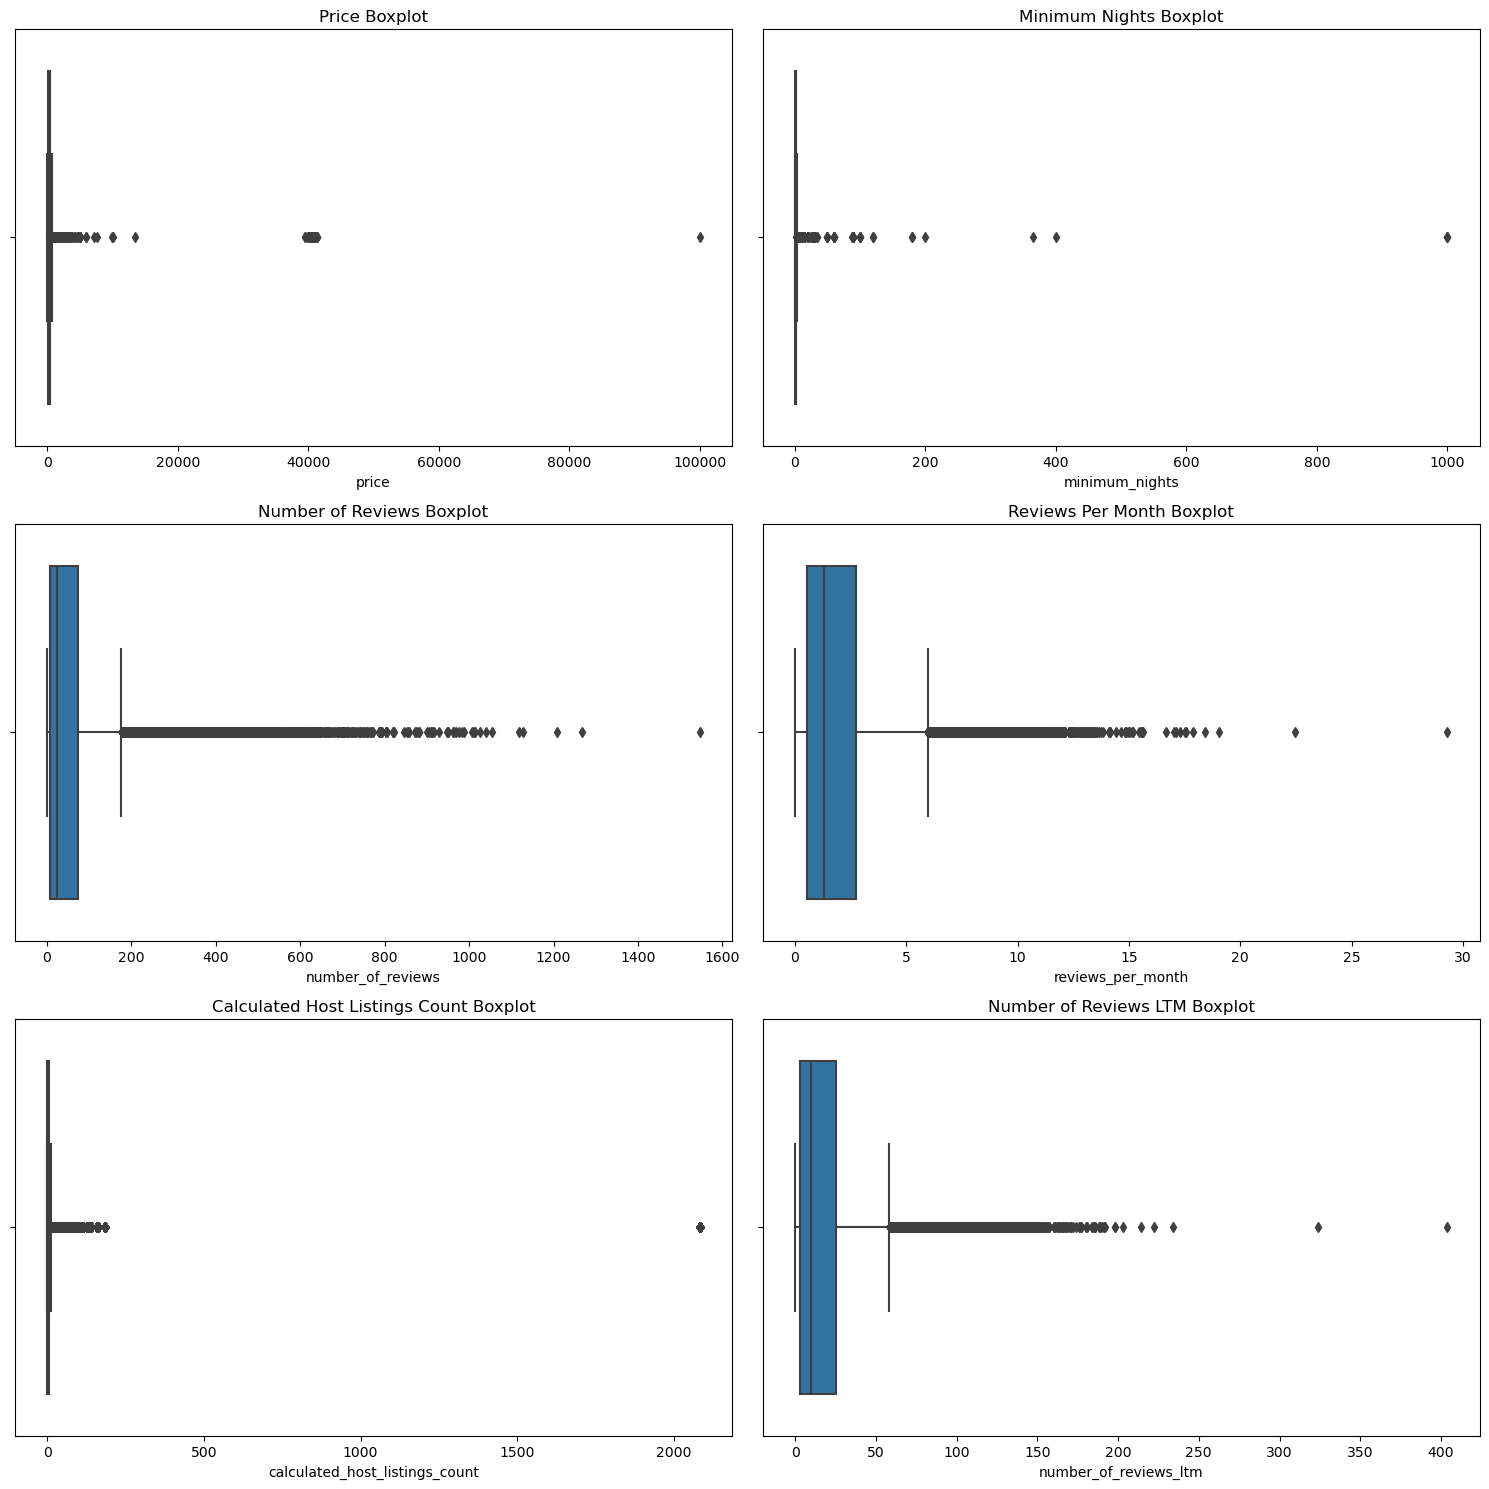

In [17]:
plt.figure(figsize=(15, 15))

plt.subplot(3, 2, 1)
sns.boxplot(x=df['price'])
plt.title('Price Boxplot')

plt.subplot(3, 2, 2)
sns.boxplot(x=df['minimum_nights'])
plt.title('Minimum Nights Boxplot')

plt.subplot(3, 2, 3)
sns.boxplot(x=df['number_of_reviews'])
plt.title('Number of Reviews Boxplot')

plt.subplot(3, 2, 4)
sns.boxplot(x=df['reviews_per_month'])
plt.title('Reviews Per Month Boxplot')

plt.subplot(3, 2, 5)
sns.boxplot(x=df['calculated_host_listings_count'])
plt.title('Calculated Host Listings Count Boxplot')

plt.subplot(3, 2, 6)
sns.boxplot(x=df['number_of_reviews_ltm'])
plt.title('Number of Reviews LTM Boxplot')

plt.tight_layout()
plt.show()

In [18]:
Q1 = describe_data.loc['25%']
Q3 = describe_data.loc['75%']
IQR = Q3 - Q1

lower_bounds = Q1 - 1.5 * IQR
upper_bounds = Q3 + 1.5 * IQR

for column in ['price', 'minimum_nights', 'number_of_reviews','reviews_per_month','calculated_host_listings_count','number_of_reviews_ltm']:
    df = df[(df[column] >= lower_bounds[column]) & (df[column] <= upper_bounds[column])]


In [19]:
df

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,Kamahi,202747,Taupo District,Turangi-Tongariro Ward,-38.908620,175.752850,Entire home/apt,255.000000,2,25,0.45,1,336,8
1,PORTAGE HEIGHTS MARLBOROUGH SOUNDS,236005,Marlborough District,Marlborough Sounds Ward,-41.193260,174.033740,Private room,290.000000,2,59,0.49,1,1,7
2,By Waipuna Park,256989,Tauranga City,Te Papa-Welcome Bay Ward,-37.733360,176.175170,Private room,113.000000,1,31,0.23,1,322,6
4,16 Havelock Bed and Breakfast,309199,New Plymouth District,New Plymouth City Ward,-39.069350,174.040850,Private room,110.000000,1,61,0.39,1,265,1
6,Abby's Holiday Home,436984,Timaru District,Geraldine Ward,-44.092680,171.238340,Entire home/apt,140.000000,2,55,0.50,1,222,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43376,Tiny Cabin in Quiet Garden Space,499091946,Christchurch City,Banks Peninsula Ward,-43.629547,172.741569,Entire home/apt,75.000000,2,1,1.00,4,269,1
43395,Relax in the Warmth of Westport,560948008,Buller District,Westport Ward,-41.746622,171.600420,Entire home/apt,208.190476,1,1,1.00,1,223,1
43399,Newly renovated 2 bed cottage,560960812,Auckland,Albany Ward,-36.774212,174.665729,Entire home/apt,240.000000,1,1,1.00,1,235,1
43415,2 bedroom home with sea views,561099139,Wellington City,Motukairangi/Eastern Ward,-41.298899,174.805334,Entire home/apt,160.000000,1,1,1.00,1,232,1


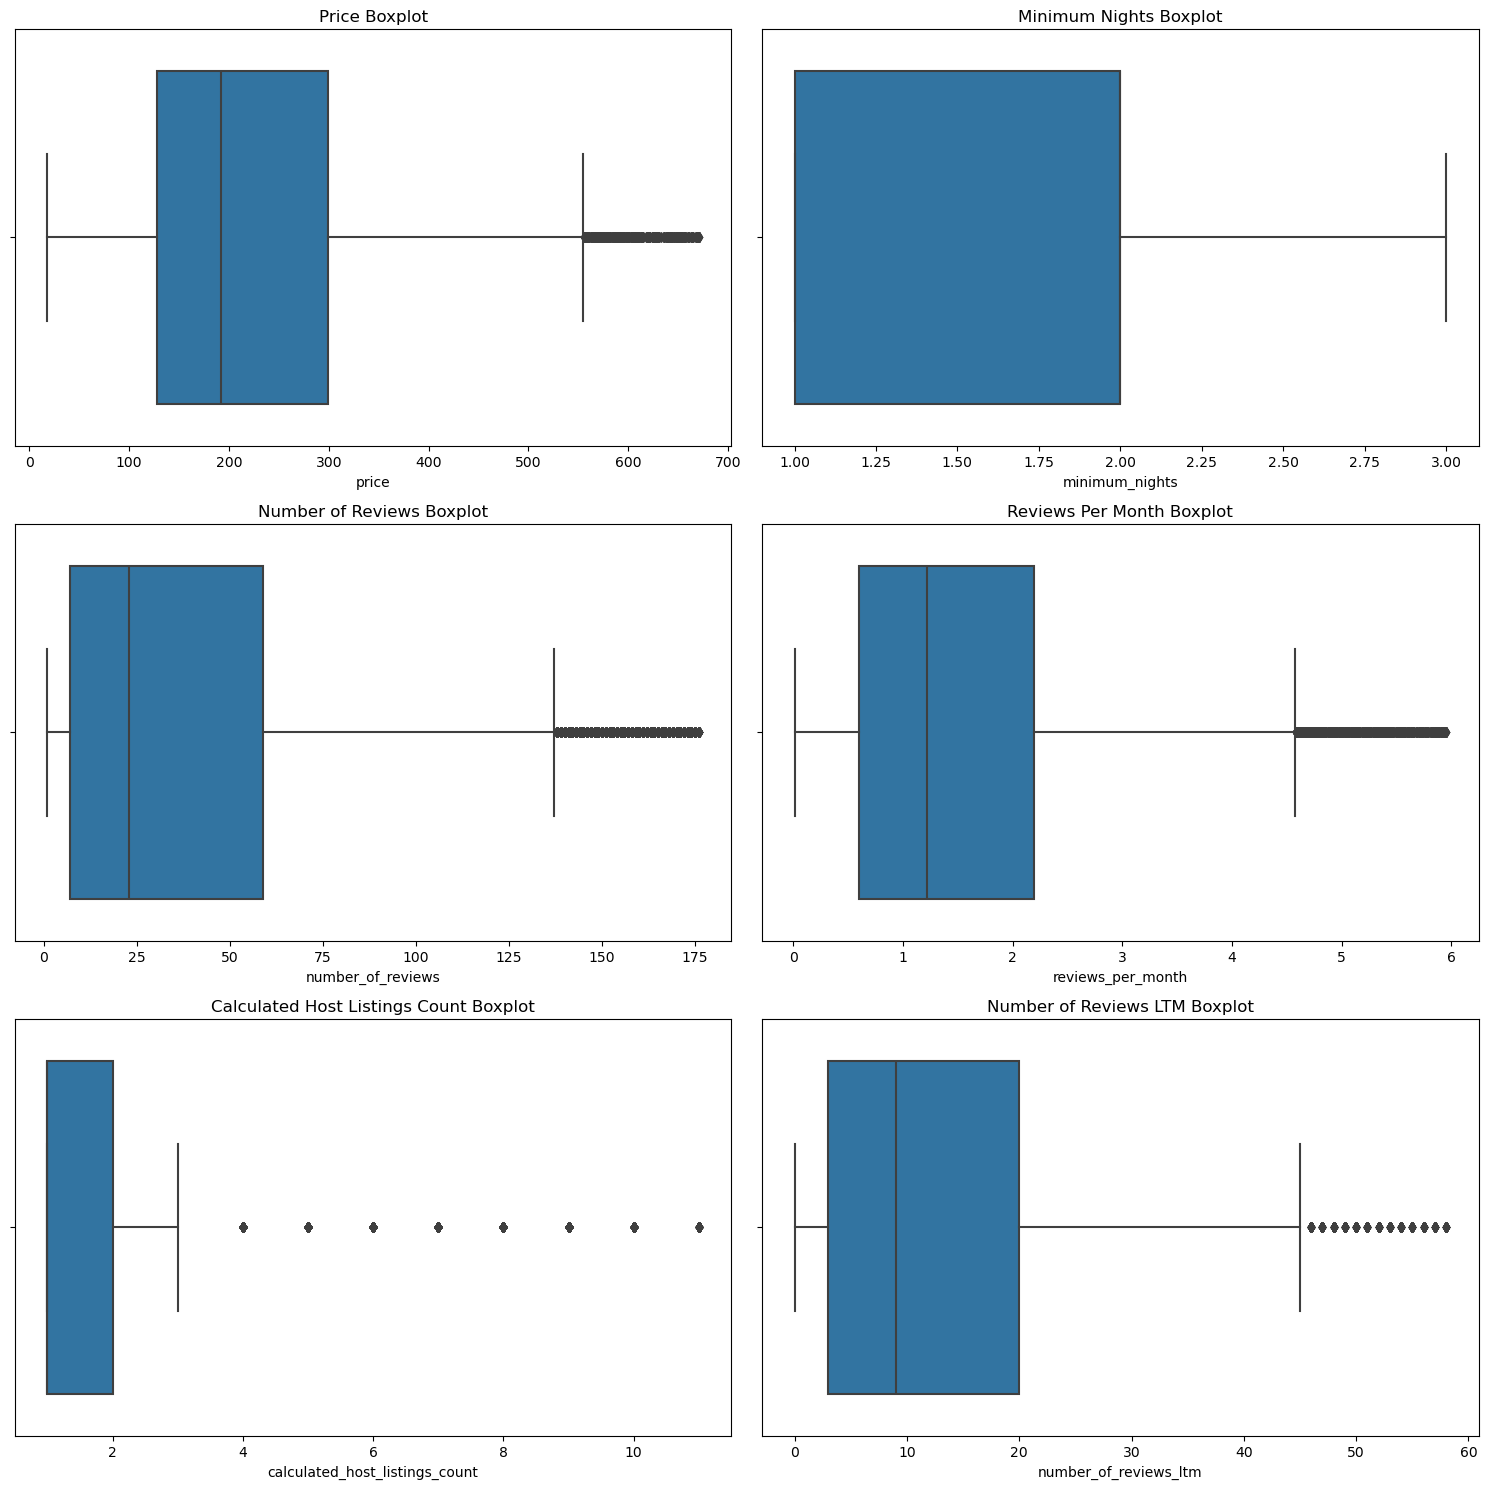

In [20]:
plt.figure(figsize=(15, 15))

plt.subplot(3, 2, 1)
sns.boxplot(x=df['price'])
plt.title('Price Boxplot')

plt.subplot(3, 2, 2)
sns.boxplot(x=df['minimum_nights'])
plt.title('Minimum Nights Boxplot')

plt.subplot(3, 2, 3)
sns.boxplot(x=df['number_of_reviews'])
plt.title('Number of Reviews Boxplot')

plt.subplot(3, 2, 4)
sns.boxplot(x=df['reviews_per_month'])
plt.title('Reviews Per Month Boxplot')

plt.subplot(3, 2, 5)
sns.boxplot(x=df['calculated_host_listings_count'])
plt.title('Calculated Host Listings Count Boxplot')

plt.subplot(3, 2, 6)
sns.boxplot(x=df['number_of_reviews_ltm'])
plt.title('Number of Reviews LTM Boxplot')

plt.tight_layout()
plt.show()

# Data analysis & visualizations 

### Top 10 Hosts:
By identifying hosts with the most properties, stakeholders can understand which hosts have a significant presence in the market and potentially explore collaboration opportunities.

In [21]:
top_10_hosts = df.groupby('host_id').size().reset_index(name='Number of Properties').sort_values(by='Number of Properties', ascending=False)
top_10_hosts.head(10)

,host_id,Number of Properties
4202,50694865,11
1848,19080316,11
14793,374483167,10
1169,10683394,10
14545,358887640,10
7792,111079392,10
4477,54408019,10
16643,487909079,10
14338,342336273,10
14493,354582481,10


### Distribution of Room Types:
Understanding the distribution of room types allows stakeholders to gauge the diversity of accommodations available on the platform, catering to different preferences and budgets of travelers.

In [22]:
room_type_counts = df.groupby('room_type').size().reset_index(name='Count')
room_type_counts

,room_type,Count
0,Entire home/apt,17718
1,Hotel room,175
2,Private room,5555
3,Shared room,84


C:\Users\L\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


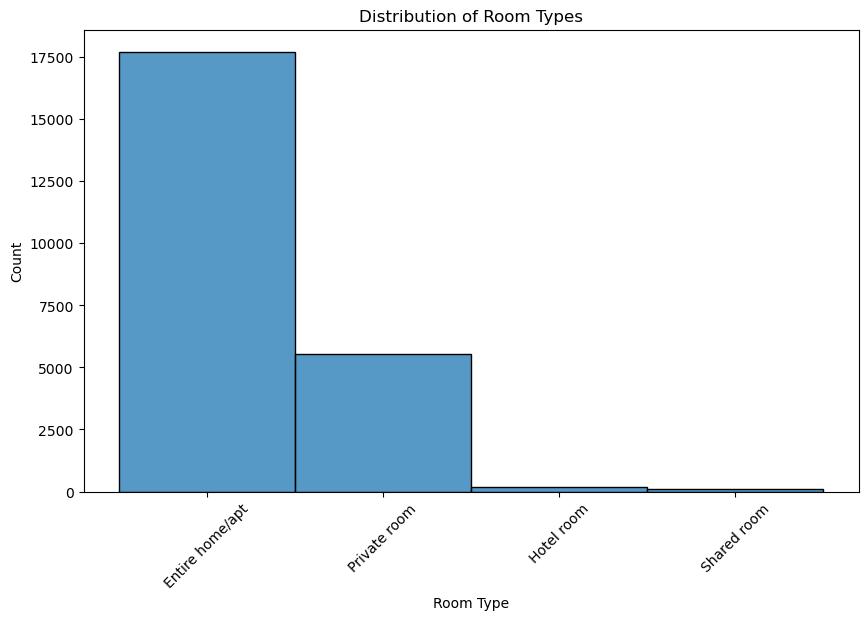

In [23]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='room_type', discrete=True)
plt.title('Distribution of Room Types')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.xticks(rotation=45)  
plt.show()

### Relationship between Room Type and Availability:
This visualization helps stakeholders understand how the availability of different room types varies throughout the year, providing insights into seasonal demand patterns.



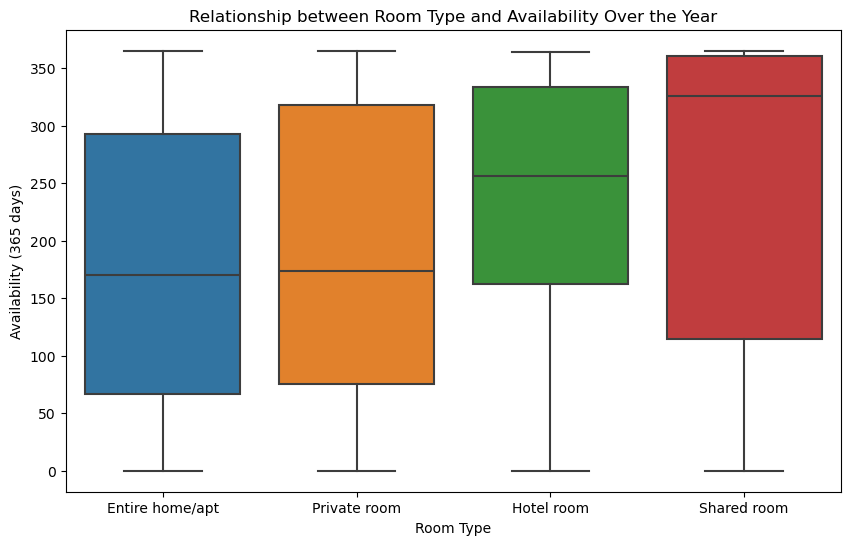

In [24]:
# نوع الغرفة وعدد التوافر خلال السنة
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='room_type', y='availability_365')
plt.title('Relationship between Room Type and Availability Over the Year')
plt.xlabel('Room Type')
plt.ylabel('Availability (365 days)')
plt.show()

### Average Price by Room Type:
By comparing the average prices of different room types, stakeholders can identify which types of accommodations command higher prices and adjust their pricing strategies accordingly.



In [25]:
# متسوط السعر لكل انواع الغرف
average_price = df['price'].mean()
average_price

226.4593193405443

In [26]:
# تجميع البيانات بناءً على نوع الغرفة وحساب متوسط السعر وعدد التقييمات
room_type_stats = df.groupby('room_type').agg({'price': 'mean', 'number_of_reviews': 'sum'}).reset_index()
room_type_stats

,room_type,price,number_of_reviews
0,Entire home/apt,257.034436,740237
1,Hotel room,248.983686,4126
2,Private room,130.549311,184058
3,Shared room,72.988095,1953


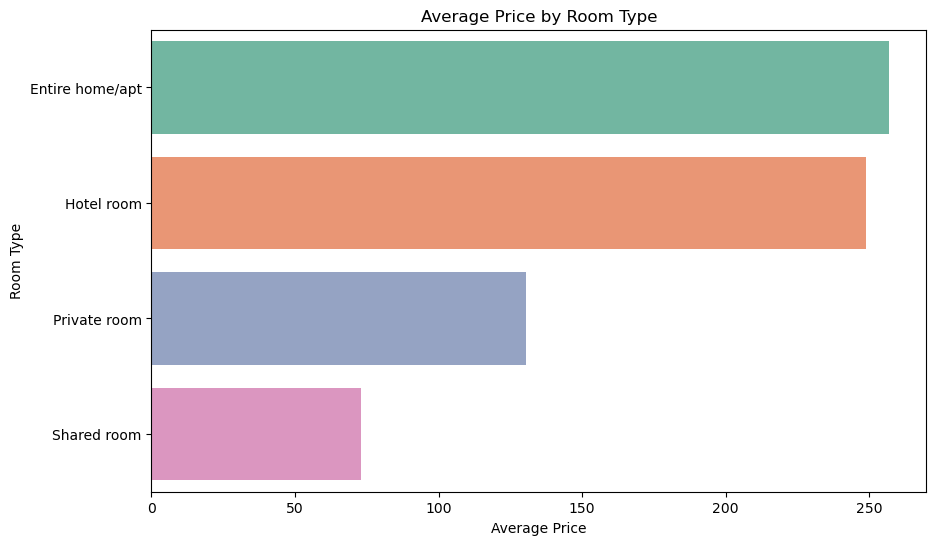

In [27]:
room_type_price = df.groupby('room_type')['price'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=room_type_price, y='room_type', x='price', palette='Set2')
plt.title('Average Price by Room Type')
plt.xlabel('Average Price')
plt.ylabel('Room Type')
plt.show()

### Room Count by Neighbourhood and Room Type:
This analysis provides a detailed breakdown of the number of properties by room type in each neighborhood, enabling stakeholders to assess the variety of accommodations available in different areas.



In [28]:
# تجميع البيانات بناءً على الحي ونوع الغرف وحساب عدد الغرف لكل حالة
room_count_by_neighbourhood_and_room_type = df.groupby(['neighbourhood', 'room_type']).size().unstack(fill_value=0).reset_index()
room_count_by_neighbourhood_and_room_type

room_type,neighbourhood,Entire home/apt,Hotel room,Private room,Shared room
0,Ahuriri Ward,210,0,33,1
1,Albany Ward,352,0,172,0
2,Albert-Eden-Puketāpapa Ward,254,0,170,0
3,Aramoana-Ruahine Ward,42,0,7,0
4,Area Outside Ward,1636,40,590,9
...,...,...,...,...,...
204,Wharangi/Onslow-Western Ward,93,0,44,0
205,Wharepuhunga Ward,2,0,0,0
206,Whau Ward,44,0,71,0
207,Ōrākei Ward,165,1,114,1


### Average Minimum Nights:
Knowing the average minimum nights required for booking provides insights into the booking preferences of guests and helps hosts set minimum stay policies accordingly.


In [29]:
# حساب متوسط عدد الليالي المطلوبة للحجز
average_minimum_nights = df['minimum_nights'].mean()
average_minimum_nights

1.6681115077341493

In [30]:
night_count = df.groupby('minimum_nights').size().reset_index(name='Number of Properties')
night_count

,minimum_nights,Number of Properties
0,1,9922
1,2,11498
2,3,2112


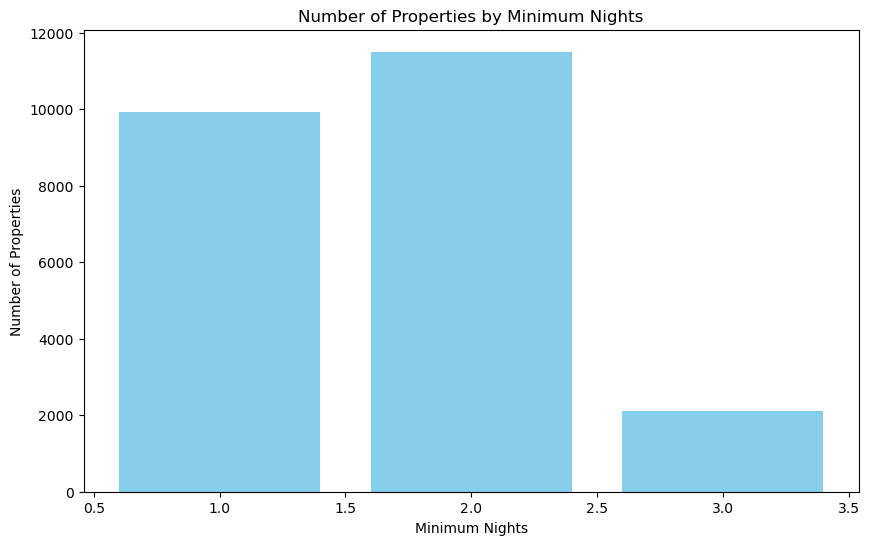

In [31]:
plt.figure(figsize=(10, 6))
plt.bar(night_count['minimum_nights'], night_count['Number of Properties'], color='skyblue')
plt.title('Number of Properties by Minimum Nights')
plt.xlabel('Minimum Nights')
plt.ylabel('Number of Properties')
plt.show()

### Number of Properties and Average Reviews by Neighbourhood Group:
This scatter plot shows the relationship between the number of properties and the average reviews per month for each neighborhood group, helping stakeholders identify neighborhoods with high demand and positive guest feedback.



In [32]:
#ماهو عدد العقارات في كل مجموعة حيوية وما متوسط التقييم لهذه المجموعات خلال 12 شهر

# تجميع البيانات بناءً على المجموعة الحيوية وحساب عدد العقارات في كل مجموعة
properties_per_neighborhood_group = df.groupby('neighbourhood_group').size().reset_index(name='Number of Properties')

# تجميع البيانات بناءً على المجموعة الحيوية وحساب متوسط التقييم للـ 12 شهر الأخيرة
reviews_per_neighborhood_group = df.groupby('neighbourhood_group')['reviews_per_month'].mean().reset_index(name='Average Reviews per Month')

# دمج البيانات في جدول واحد
merged_data = pd.merge(properties_per_neighborhood_group, reviews_per_neighborhood_group, on='neighbourhood_group')
merged_data


,neighbourhood_group,Number of Properties,Average Reviews per Month
0,Ashburton District,111,1.374595
1,Auckland,4282,1.482581
2,Buller District,156,1.333782
3,Carterton District,63,1.675556
4,Central Hawke's Bay District,61,1.204426
...,...,...,...
62,Whakatane District,170,1.591824
63,Whanganui District,163,1.944479
64,Whangarei District,544,1.592224
65,Ōpōtiki District,62,1.137419


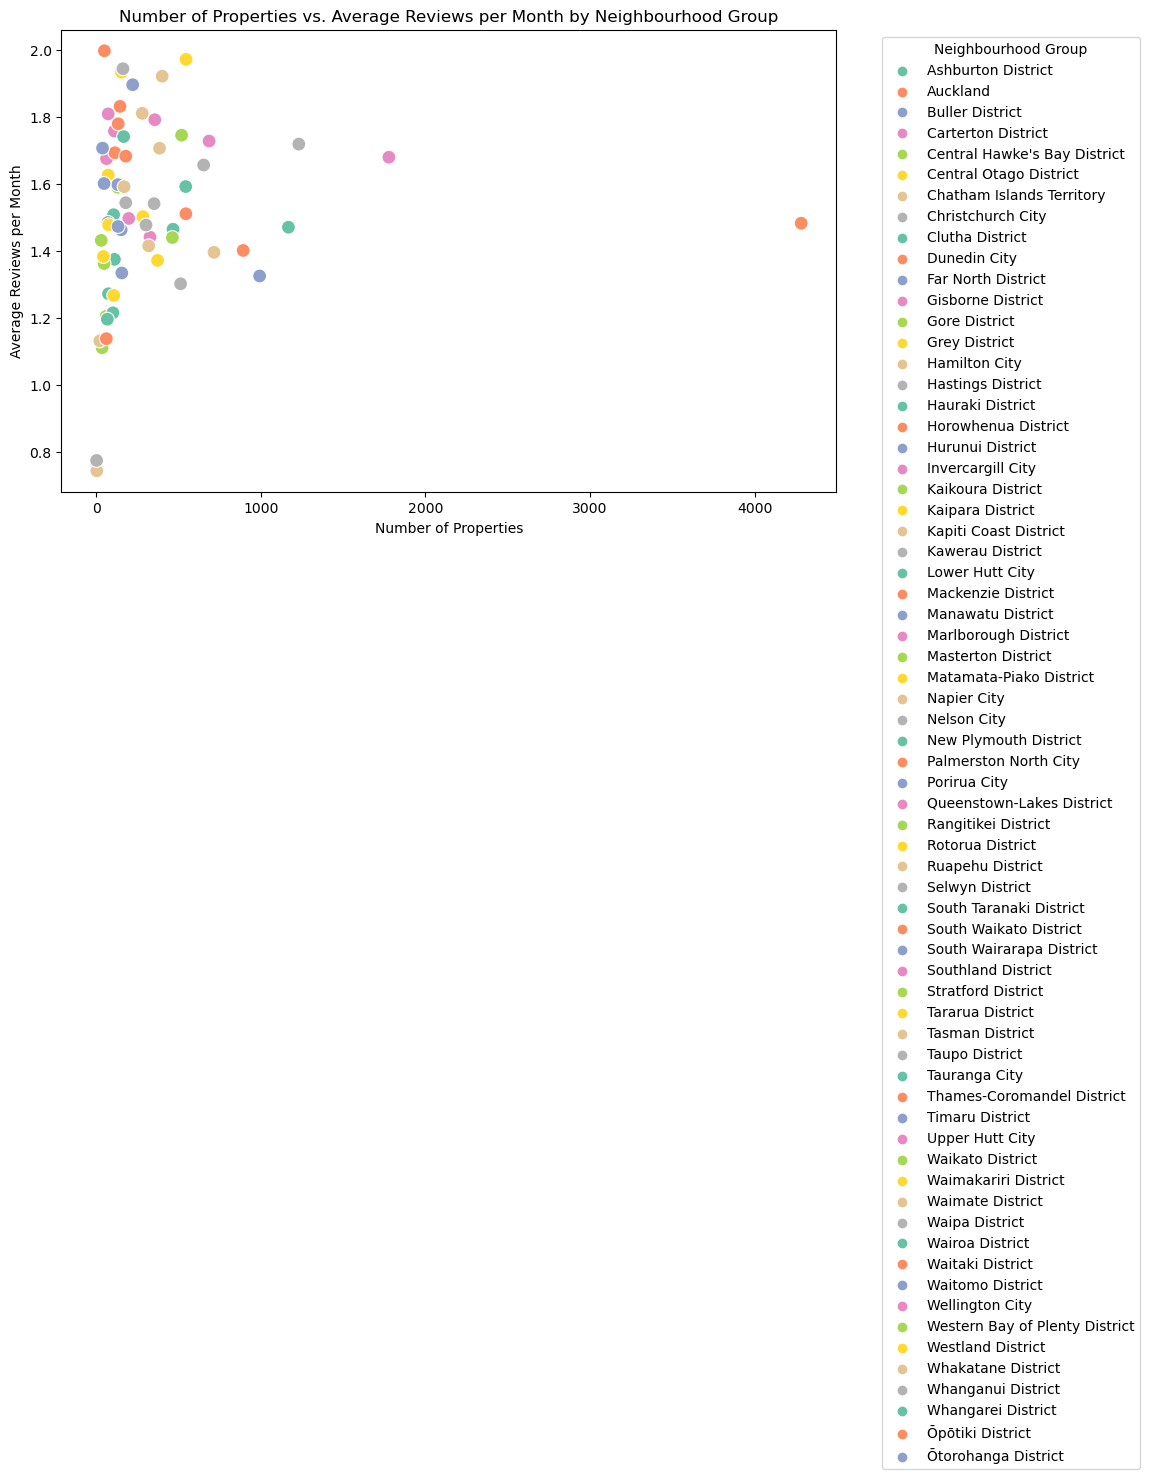

In [33]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_data, x='Number of Properties', y='Average Reviews per Month', hue='neighbourhood_group', palette='Set2', s=100)
plt.title('Number of Properties vs. Average Reviews per Month by Neighbourhood Group')
plt.xlabel('Number of Properties')
plt.ylabel('Average Reviews per Month')
plt.legend(title='Neighbourhood Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Highest Rated Neighbourhood Group:
By identifying the neighborhood group with the highest average reviews per month, stakeholders can pinpoint areas with high guest satisfaction and potentially target their marketing efforts towards those neighborhoods.



In [34]:
# المجموعة الحيوية الاعلى متوسط تقييم

# العثور على أعلى متوسط تقييم
max_rating = reviews_per_neighborhood_group['Average Reviews per Month'].max()
# العثور على اسم المجموعة الحيوية المقابل لأعلى متوسط تقييم
highest_rated_neighborhood_group = reviews_per_neighborhood_group[reviews_per_neighborhood_group['Average Reviews per Month'] == max_rating]['neighbourhood_group']

result = f"Highest rated neighborhood group: {highest_rated_neighborhood_group.values[0]} - Rating: {max_rating}"
print(result)

Highest rated neighborhood group: South Waikato District - Rating: 1.9982


### Average Price by Neighbourhood Group:
Understanding the average prices across different neighborhood groups allows stakeholders to assess the affordability of accommodations in each area and tailor their offerings accordingly.



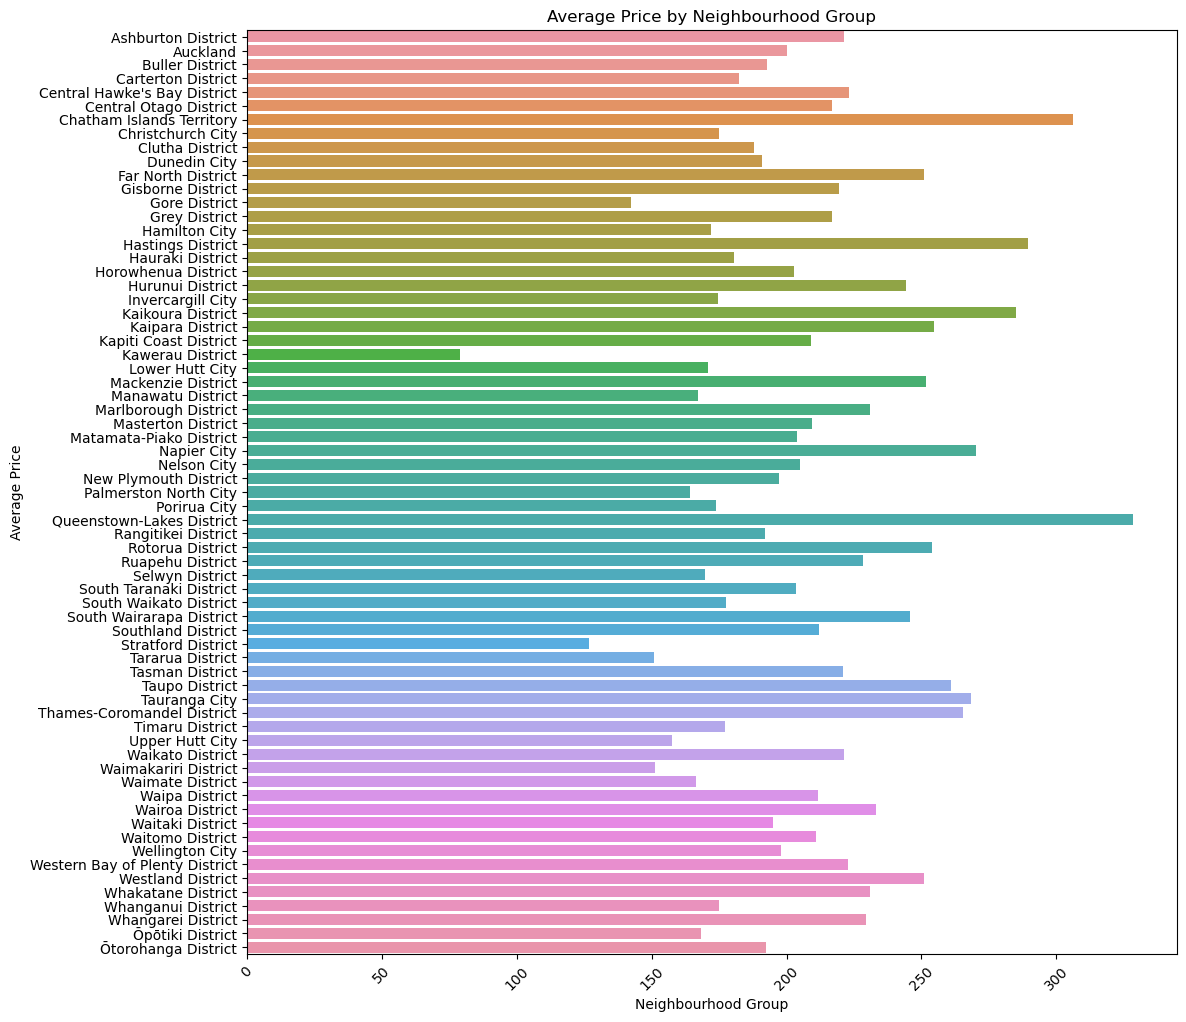

In [35]:
price_neighbourhood = df.groupby('neighbourhood_group')['price'].mean().reset_index()

plt.figure(figsize=(12, 12))
sns.barplot(data=price_neighbourhood, x='price', y='neighbourhood_group')
plt.title('Average Price by Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Average Price')
plt.xticks(rotation=45)  
plt.show()

### Average Price by Neighbourhood Group and Room Type:
This analysis provides insights into how prices vary across different neighborhood groups and room types, enabling stakeholders to make data-driven pricing decisions.



In [36]:
# تجميع البيانات بناءً على مجموعة الحي ونوع الغرف وحساب متوسط السعر لكل حالة

average_price_by_neighbourhood_group_and_room_type = df.groupby(['neighbourhood_group', 'room_type'])['price'].mean().unstack().reset_index()
average_price_by_neighbourhood_group_and_room_type

room_type,neighbourhood_group,Entire home/apt,Hotel room,Private room,Shared room
0,Ashburton District,238.932595,205.333333,135.000000,NaN
1,Auckland,248.190998,252.894737,104.864576,63.125
2,Buller District,216.462485,NaN,118.555556,42.000
3,Carterton District,189.925926,NaN,137.222222,NaN
4,Central Hawke's Bay District,246.520000,NaN,116.090909,NaN
...,...,...,...,...,...
62,Whakatane District,246.414966,NaN,132.636364,135.000
63,Whanganui District,204.495490,NaN,111.360000,35.000
64,Whangarei District,246.527031,195.000000,130.807726,90.000
65,Ōpōtiki District,179.740741,NaN,91.000000,NaN


### Distribution of Booking Prices Over the Year:
This histogram illustrates the distribution of booking prices, helping stakeholders understand the range of prices offered on the platform and identify any pricing trends.



C:\Users\L\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


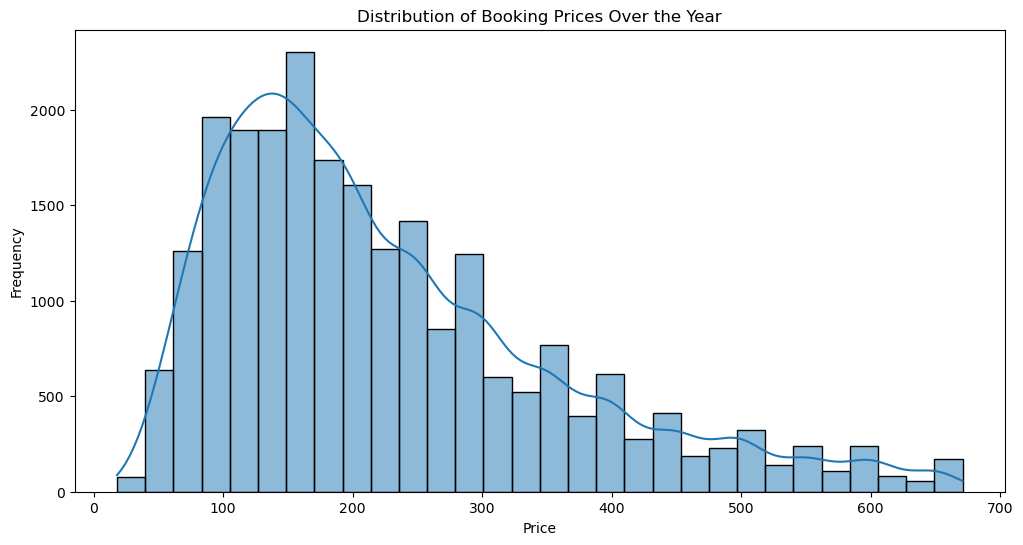

In [37]:
# توزيع أسعار الحجوزات على مدار السنة
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='price', bins=30, kde=True)
plt.title('Distribution of Booking Prices Over the Year')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Note:
الكود هذا يعرض خريطة وتوزيع العقارات في المدينة - لم اقم بتشغيل الكود لانه يزيد من حجم النوت بوك إلى 35 قيقا بايت

## To try the code first install this library:
pip install folium


### Interactive Map of Airbnb Listings:
The interactive map provides a visual representation of Airbnb listings in the city, allowing stakeholders to explore the geographical distribution of properties and assess their proximity to amenities and attractions.



In [ ]:
map_airbnb = folium.Map(location=[df['latitude'].mean(), df['longitude'].mean()], zoom_start=10)

# إضافة نقاط العقارات إلى الخريطة مع تلوينها حسب السعر
for index, row in df.iterrows():
    folium.CircleMarker(location=[row['latitude'], row['longitude']],
                        radius=5,
                        popup=f"Price: {row['price']}$",
                        fill=True,
                        fill_color='blue' if row['price'] < 100 else 'red',  # تلوين النقاط حسب السعر
                        color='grey',
                        fill_opacity=0.7).add_to(map_airbnb)

# عرض الخريطة
map_airbnb